# FreshFlow take-home challenge

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

## 1 - Read dataset

In [2]:
data_file = "../data/data.csv"
df = pd.read_csv(data_file).set_index("Unnamed: 0")
df.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
Unnamed: 0,,,,,,,,
0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
1,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
3,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84


#### Define interesting figures

In [3]:
df.head()


,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
Unnamed: 0,,,,,,,,
0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
1,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
3,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84


In [4]:
# Define total sales as sum of orders and in-day sales

df["unit_margin"] = df.apply(axis=1, func=lambda x: x["suggested_retail_price"]-x["purchase_price"])

df["total_sales"] = df.apply(axis=1, func=lambda x: x["orders_quantity"]+x["sales_quantity"])

# Define total cost of goods as the purchase price times the amount sold
df["cost"] = df.apply(axis=1, func=lambda x: x["purchase_price"]*x["total_sales"])

# Define net income as revenue-cost
df["net_income"] = df.apply(axis=1, func=lambda x:x["revenue"]- x["cost"])

# Define total sales per product
sales = df.pivot_table(index="day", values="total_sales", columns="item_number", aggfunc=sum, fill_value=0)
sales["all"] = sales.sum(axis=1)

# Define daily revenues per product
revenues = df.pivot_table(index="day", values="revenue", columns="item_number", aggfunc=sum, fill_value=0)
revenues["all"] = revenues.sum(axis=1)

# Define daily costs per product
costs = df.pivot_table(index="day", values="cost", columns="item_number", aggfunc=sum, fill_value=0)
costs["all"] = costs.sum(axis=1)

# Define net income
income = df.pivot_table(index="day", values="net_income", columns="item_number", aggfunc=sum, fill_value=0)
income["all"] = income.sum(axis=1)

# Define average product purchase price
prices = df.pivot_table(index="day", values="purchase_price", columns="item_number", aggfunc='mean', fill_value=None)


In [5]:
df.head()

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,unit_margin,total_sales,cost,net_income
Unnamed: 0,,,,,,,,,,,,
0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55,0.57,16.0,14.72,8.83
1,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55,0.57,16.0,14.72,8.83
2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47,1.44,3.0,6.15,4.32
3,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47,1.44,3.0,6.15,4.32
4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84,0.35,13.0,8.32,4.52


## Data analysis

In [6]:
columns = [80028349, 80101923, 80317483, "all"]

#### Sales

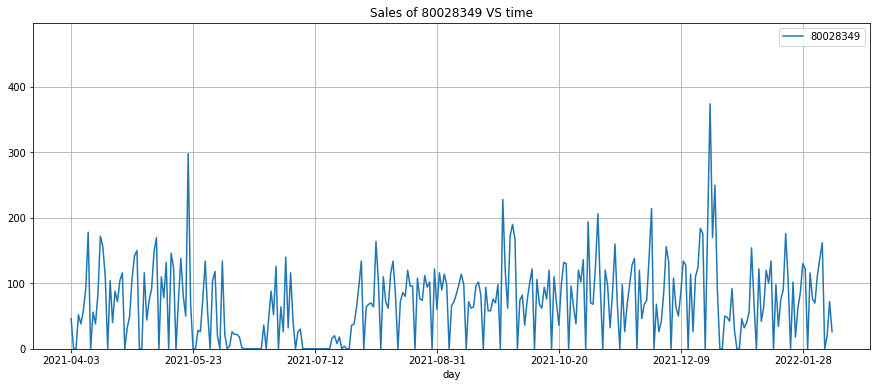

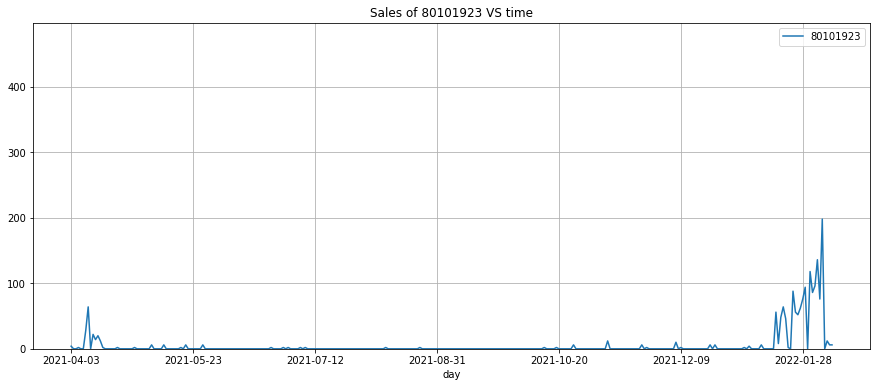

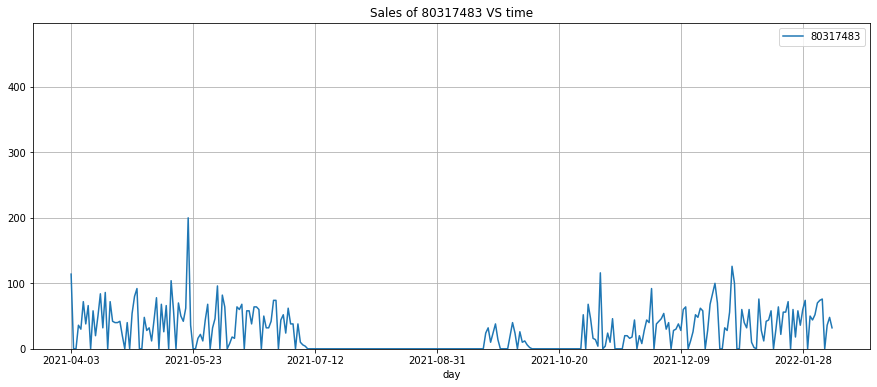

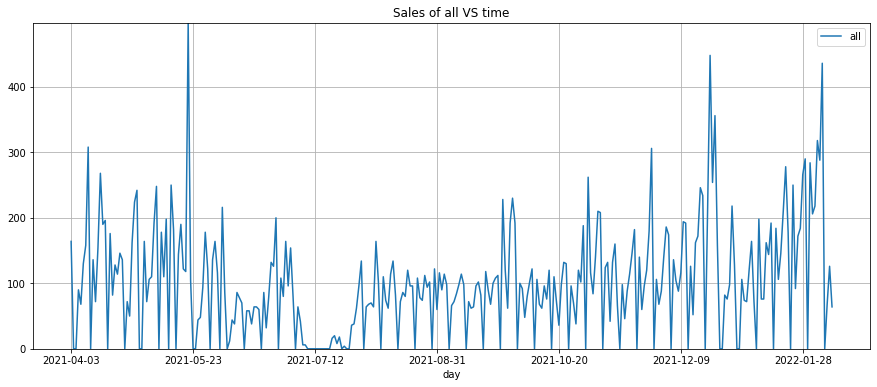

In [7]:
for col in columns: 
    sales.plot(y=col, figsize=(15,6),grid=True, style='-', ylim=(0,sales["all"].max()), title="Sales of {} VS time".format(col))


#### Revenues

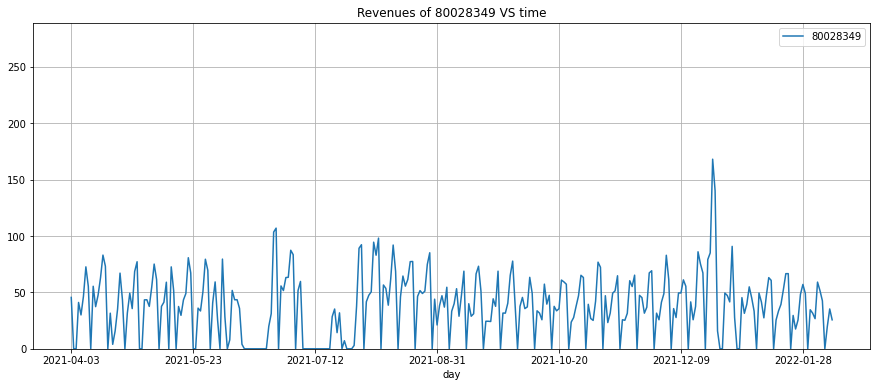

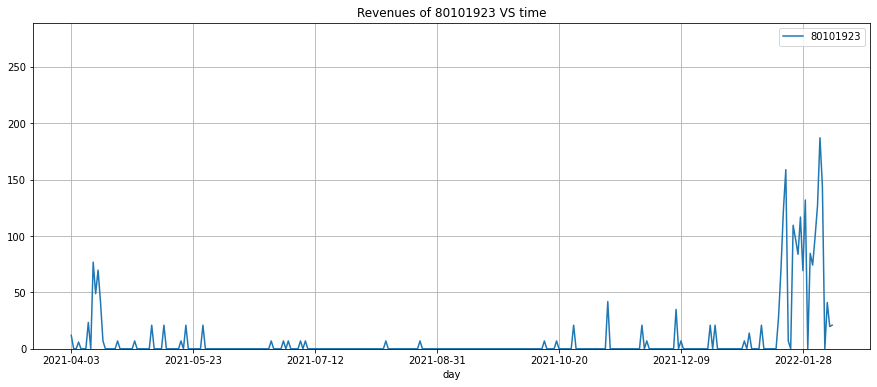

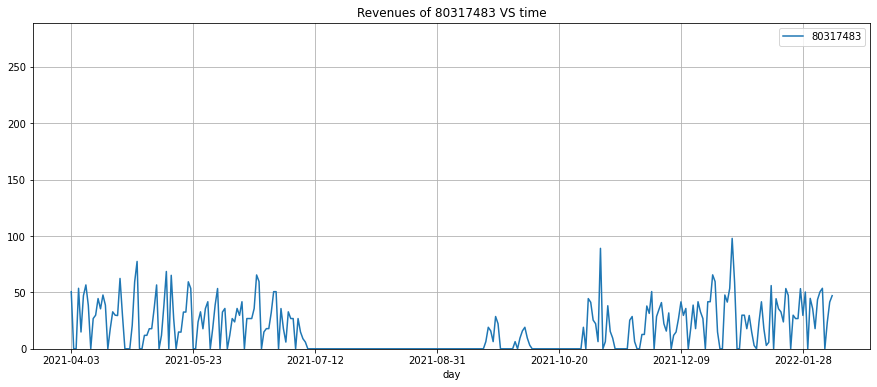

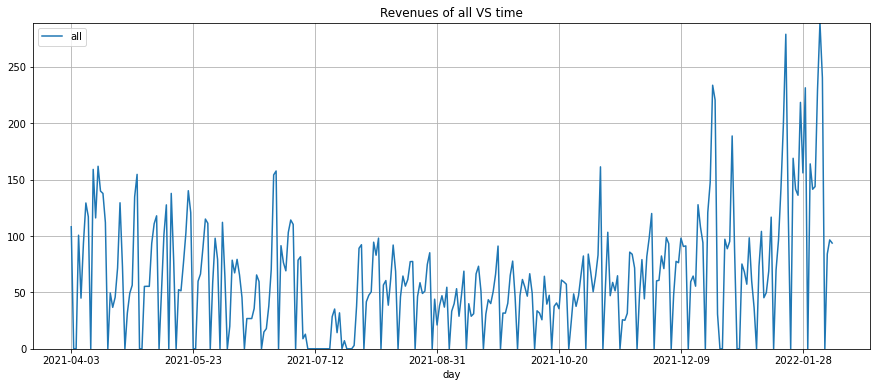

In [8]:
for col in columns: 
    revenues.plot(y=col, figsize=(15,6),grid=True, style='-', ylim=(0,revenues["all"].max()), title="Revenues of {} VS time".format(col))


#### Income components ----

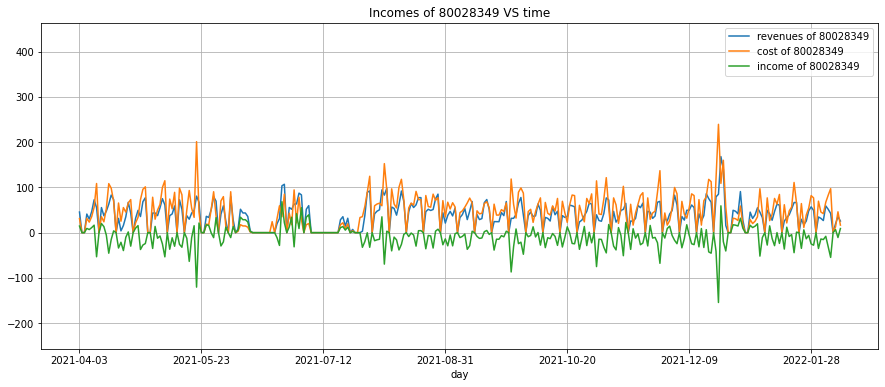

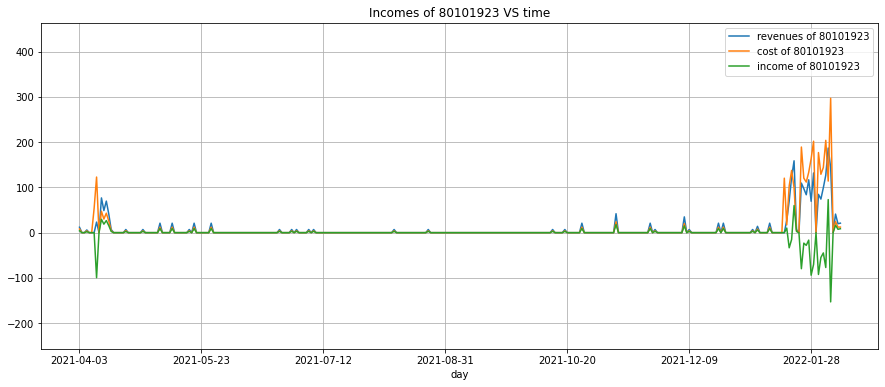

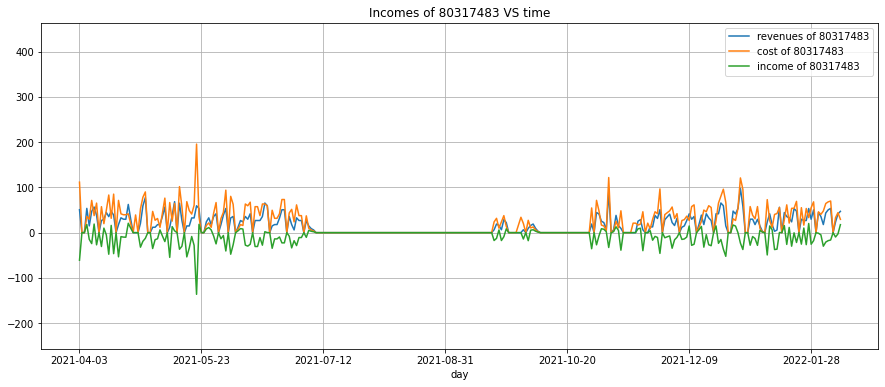

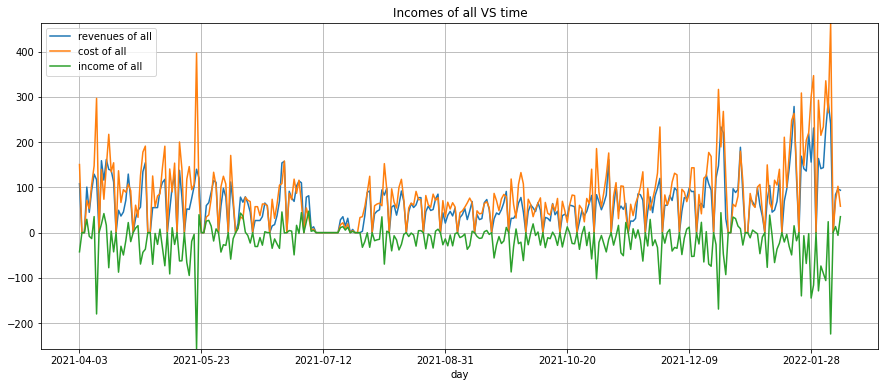

In [9]:
for col in columns: 
    ax=None
    ax=revenues.plot(y=col, figsize=(15,6),grid=True, style='-', ax=ax, ylim=(min(revenues.values.min(),income.values.min(),costs.values.min()),max(revenues.values.max(),income.values.max(),costs.values.max())), title="Revenues of {} VS time".format(col), label="revenues of {}".format(col))
    ax=costs.plot(y=col, figsize=(15,6),grid=True, style='-', ax=ax, ylim=(min(revenues.values.min(),income.values.min(),costs.values.min()),max(revenues.values.max(),income.values.max(),costs.values.max())), title="Costs of {} VS time".format(col), label="cost of {}".format(col))
    ax=income.plot(y=col, figsize=(15,6),grid=True, style='-', ax=ax, ylim=(min(revenues.values.min(),income.values.min(),costs.values.min()),max(revenues.values.max(),income.values.max(),costs.values.max())), title="Incomes of {} VS time".format(col), label="income of {}".format(col))


#### Prices

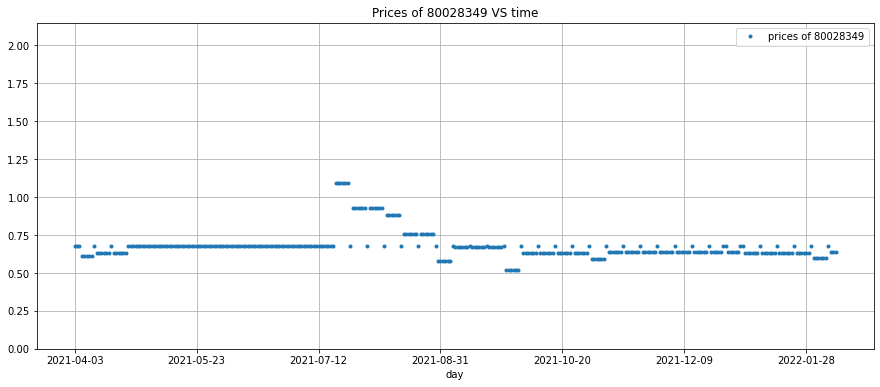

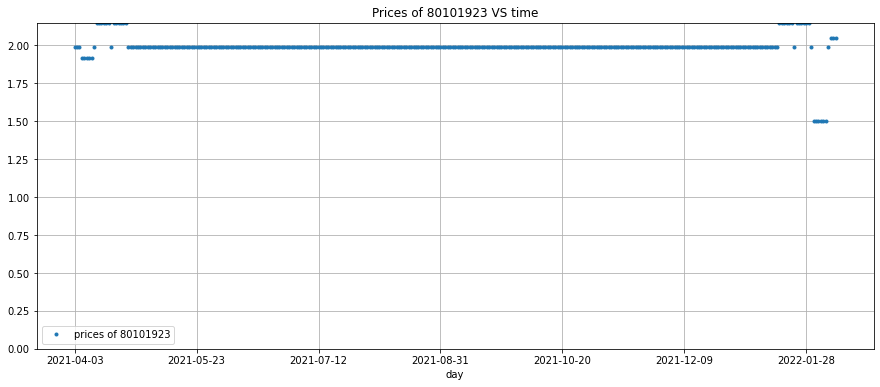

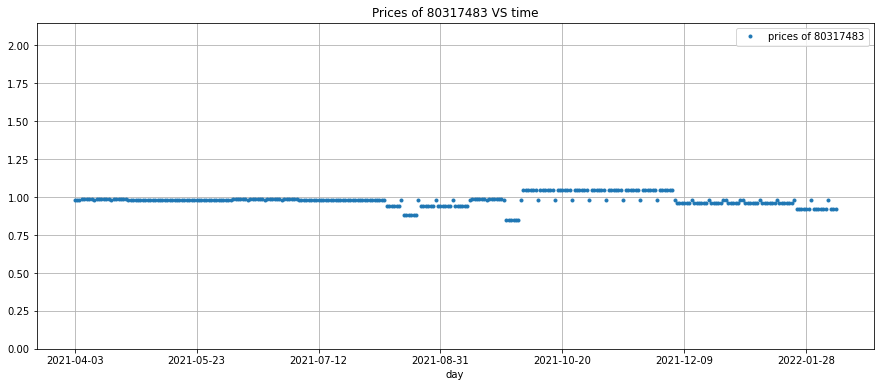

In [10]:
columns = [80028349, 80101923, 80317483]
for col in columns: 
    prices.plot(y=col, figsize=(15,6),grid=True, style='.', ylim=(0, prices.values.max()), title="Prices of {} VS time".format(col), label="prices of {}".format(col))
    

## Modeling

Let's build a model to predict total sales

#### Train-test split

As training set, a year time is used

In [11]:
columns = [80028349, 80101923, 80317483]
split_index = list(sales.index).index("2022-01-01")

train_df = sales.iloc[:split_index][columns]
train_mean = train_df.mean()
train_std = train_df.std()
train_df = (train_df - train_mean) / train_std
train_x = train_df.values

test_df = sales.iloc[split_index:][columns]
test_df = (test_df - train_mean) / train_std
test_x = test_df.values

In [12]:
window_size = 100
batch_size = 32
shuffle_buffer = 32

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

#### Architecture

In [13]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(train_x, window_size, batch_size, shuffle_buffer)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                           strides=1, padding="causal",
                           activation="relu",
                           input_shape=[None, 3]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(3),
])

#### Train

In [20]:
model.compile(loss=tf.keras.losses.Huber(),
                           optimizer="Adam",
                           metrics=["mae"])
history = model.fit(dataset, epochs=10)

Epoch 1/10
6/6 [==============================] - 2s 43ms/step - loss: 0.1464 - mae: 0.3313
Epoch 2/10
6/6 [==============================] - 0s 42ms/step - loss: 0.1453 - mae: 0.3329
Epoch 3/10
6/6 [==============================] - 0s 43ms/step - loss: 0.1469 - mae: 0.3388
Epoch 4/10
6/6 [==============================] - 0s 43ms/step - loss: 0.1452 - mae: 0.3296
Epoch 5/10
6/6 [==============================] - 0s 43ms/step - loss: 0.1433 - mae: 0.3304
Epoch 6/10
6/6 [==============================] - 0s 42ms/step - loss: 0.1422 - mae: 0.3240
Epoch 7/10
6/6 [==============================] - 0s 43ms/step - loss: 0.1444 - mae: 0.3331
Epoch 8/10
6/6 [==============================] - 0s 43ms/step - loss: 0.1434 - mae: 0.3217
Epoch 9/10
6/6 [==============================] - 0s 42ms/step - loss: 0.1400 - mae: 0.3303
Epoch 10/10
6/6 [==============================] - 0s 42ms/step - loss: 0.1398 - mae: 0.3239


#### Predict

In [21]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

model.predict(test_x)